In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage


In [2]:
X,y,c = make_blobs(500,cluster_std=0.8,centers=4, n_features=2, return_centers=True)

df_blobs = pd.DataFrame(
    {   
    'x1':X[:,0],
    'x2':X[:,1],
    'y':y,
    }
)
df_centers = pd.DataFrame(
    {
     'x1':c[:,0],
     'x2':c[:,1],
    }
)

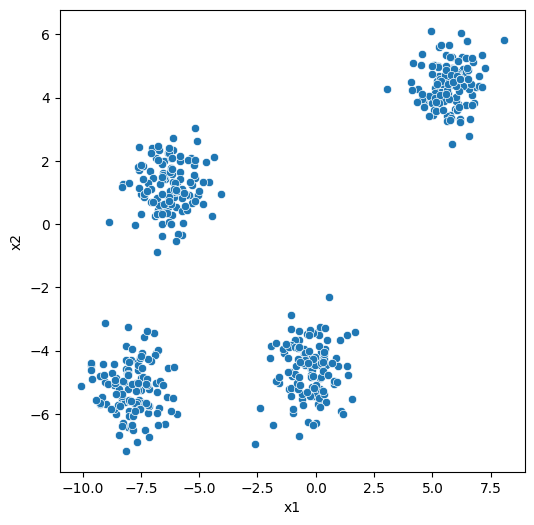

In [4]:
fig = plt.figure(figsize=(6,6))
sns.scatterplot(data=df_blobs,x='x1', y='x2')
plt.show()

## Dendograma y hierarchical cluster

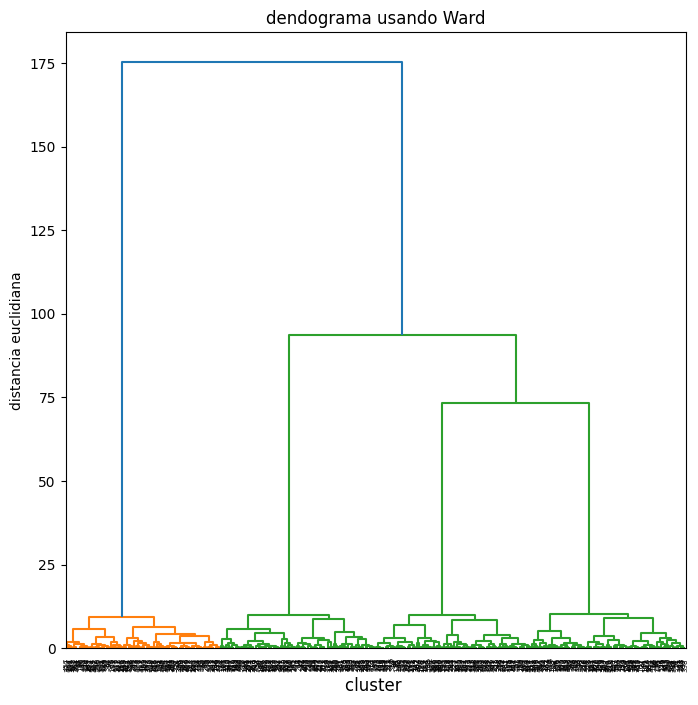

In [5]:
fig = plt.figure(figsize=(8,8))
dendogram_plot = dendrogram(linkage(X,method='ward'))
plt.title('dendograma usando Ward')
plt.xlabel('cluster ', fontsize=12)
plt.ylabel('distancia euclidiana')
plt.show()

In [16]:
hc = AgglomerativeClustering(n_clusters=4,metric='euclidean', linkage='ward')
y_hc= hc.fit_predict(X)

In [17]:
y_hc

array([3, 2, 1, 1, 0, 1, 2, 3, 3, 1, 3, 1, 3, 3, 0, 2, 1, 0, 2, 2, 2, 3,
       2, 1, 0, 0, 3, 0, 2, 3, 0, 0, 2, 3, 0, 3, 2, 2, 3, 2, 2, 2, 1, 2,
       1, 0, 0, 1, 3, 1, 3, 0, 2, 3, 2, 0, 1, 1, 1, 0, 2, 1, 0, 3, 0, 1,
       0, 3, 2, 3, 3, 3, 0, 0, 0, 1, 0, 1, 3, 3, 2, 0, 0, 1, 3, 0, 3, 2,
       1, 3, 2, 0, 1, 1, 2, 2, 1, 3, 0, 3, 2, 2, 2, 1, 0, 3, 0, 3, 0, 0,
       3, 1, 2, 3, 0, 1, 3, 1, 2, 0, 1, 0, 2, 1, 3, 0, 0, 3, 0, 3, 1, 1,
       0, 2, 1, 1, 1, 0, 1, 2, 3, 0, 3, 1, 1, 2, 0, 1, 1, 2, 0, 3, 3, 2,
       0, 3, 2, 3, 1, 1, 3, 0, 3, 0, 1, 3, 0, 1, 3, 3, 0, 3, 1, 3, 2, 3,
       0, 1, 2, 1, 2, 2, 2, 1, 3, 2, 1, 2, 3, 3, 0, 3, 3, 3, 0, 2, 3, 1,
       1, 3, 2, 1, 2, 2, 2, 1, 0, 2, 1, 1, 0, 0, 1, 2, 3, 2, 2, 3, 1, 1,
       2, 1, 2, 1, 2, 2, 2, 2, 0, 1, 1, 0, 1, 2, 1, 3, 0, 1, 1, 3, 1, 3,
       3, 3, 2, 2, 3, 1, 2, 2, 1, 3, 2, 1, 2, 1, 3, 0, 0, 3, 3, 1, 2, 2,
       1, 2, 3, 1, 0, 2, 0, 1, 3, 2, 0, 0, 0, 1, 2, 0, 2, 2, 3, 2, 3, 1,
       1, 3, 0, 1, 2, 0, 0, 1, 3, 3, 0, 0, 1, 2, 0,

In [18]:
df_blobs['clusters']= y_hc

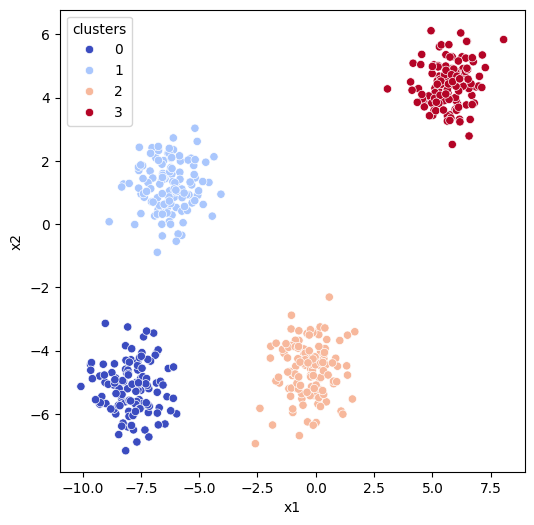

In [19]:
fig = plt.figure(figsize=(6,6))
sns.scatterplot(data=df_blobs,x='x1', y='x2', hue='clusters', palette='coolwarm')
plt.show()

In [20]:
silhouette_score(X,y_hc)

0.8117440135163113

For n_clusters = 3 The average silhouette_score is : 0.6702794444826068
For n_clusters = 4 The average silhouette_score is : 0.8117440135163113
For n_clusters = 5 The average silhouette_score is : 0.6859507531399139


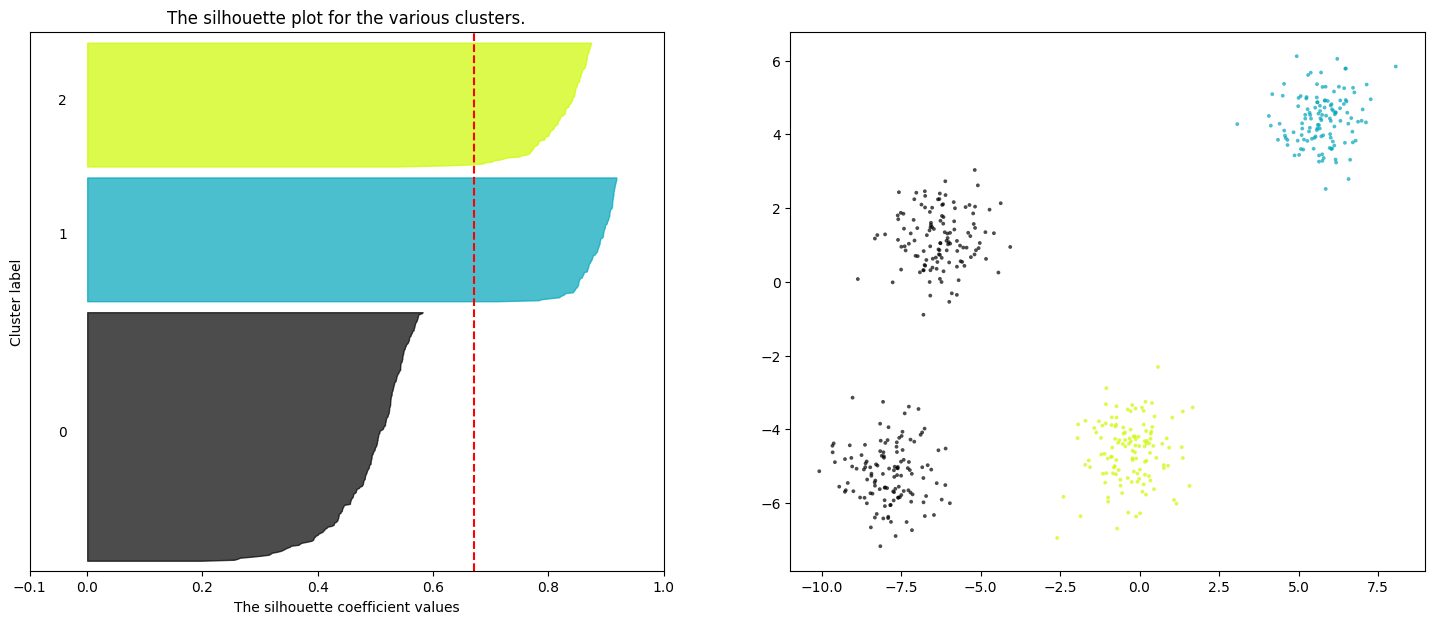

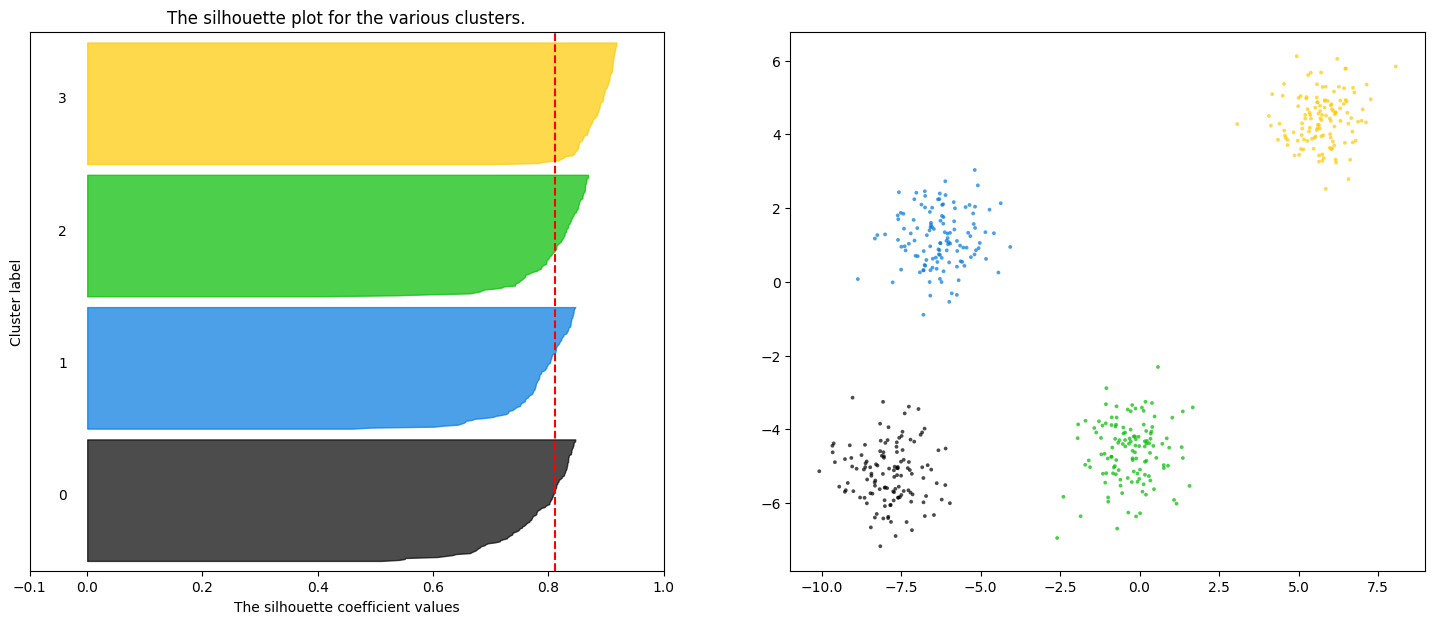

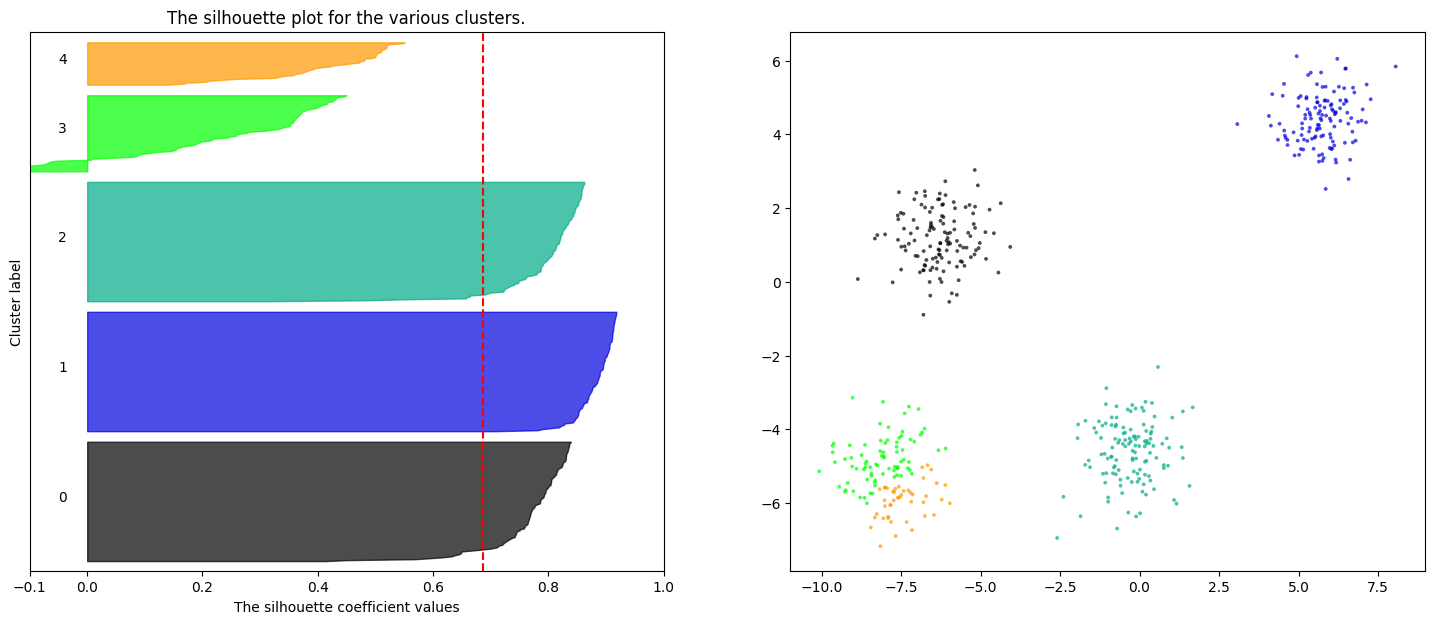

In [22]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score


range_n_clusters = [3,4,5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.

    clusterer = AgglomerativeClustering(n_clusters=n_clusters,metric='euclidean', linkage='ward')
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

  

plt.show()